!pip install ipykernel
!pip install matplotlib

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# read shapefile as geopandas
shp_path = "../data/shapefiles/2013/shapefile.shp"
gdf = gpd.read_file(shp_path)
gdf.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36522,8600000US36522,36522,570006940,3241962,"POLYGON ((-88.43201 31.11430, -88.36447 31.114..."
1,35586,8600000US35586,35586,472580465,892816,"MULTIPOLYGON (((-88.00160 33.81101, -88.00263 ..."
2,85634,8600000US85634,85634,7443310770,98313,"POLYGON ((-112.70276 32.07629, -112.69751 32.0..."
3,71854,8600000US71854,71854,721235775,14713194,"POLYGON ((-94.04345 33.55225, -94.03956 33.552..."
4,19963,8600000US19963,19963,276242161,21115750,"POLYGON ((-75.50557 38.92751, -75.50313 38.927..."


(20.0, 50.0)

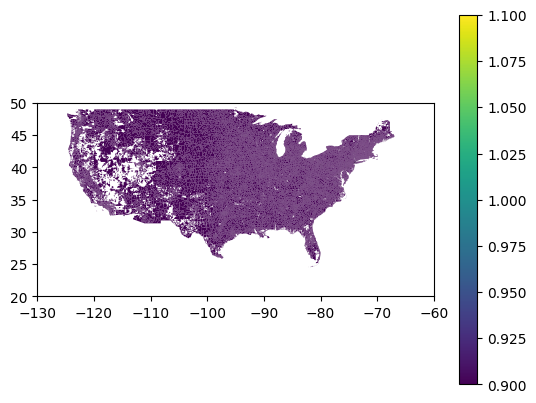

In [18]:
# plot map
gdf["dummy"] = 1
gdf.plot(column="dummy", cmap="viridis", legend=True)
# make latitude/longitude within the continental us
plt.xlim(-130, -60)
plt.ylim(20, 50)

In [14]:
out_path = "../data/output/2013.Sectors.US.BC_AGR.1km.csv"
df = pd.read_csv(
    out_path,
    dtype={"ZCTA5CE10": str})
df.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,min,max,mean,count
0,36522,8600000US36522,36522,570006940,3241962,0.000010,0.000012,0.000011,635
1,35586,8600000US35586,35586,472580465,892816,0.000012,0.000013,0.000013,580
2,85634,8600000US85634,85634,7443310770,98313,0.000001,0.000003,0.000002,7523
3,71854,8600000US71854,71854,721235775,14713194,0.000014,0.000017,0.000015,826
4,19963,8600000US19963,19963,276242161,21115750,0.000011,0.000014,0.000012,357


In [15]:
# merge geopandas and pandas
gdf = gdf.merge(df[["mean", "ZCTA5CE10"]], on="ZCTA5CE10")
gdf.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,mean
0,36522,8600000US36522,36522,570006940,3241962,"POLYGON ((-88.43201 31.11430, -88.36447 31.114...",0.000011
1,35586,8600000US35586,35586,472580465,892816,"MULTIPOLYGON (((-88.00160 33.81101, -88.00263 ...",0.000013
2,85634,8600000US85634,85634,7443310770,98313,"POLYGON ((-112.70276 32.07629, -112.69751 32.0...",0.000002
3,71854,8600000US71854,71854,721235775,14713194,"POLYGON ((-94.04345 33.55225, -94.03956 33.552...",0.000015
4,19963,8600000US19963,19963,276242161,21115750,"POLYGON ((-75.50557 38.92751, -75.50313 38.927...",0.000012


<Axes: >

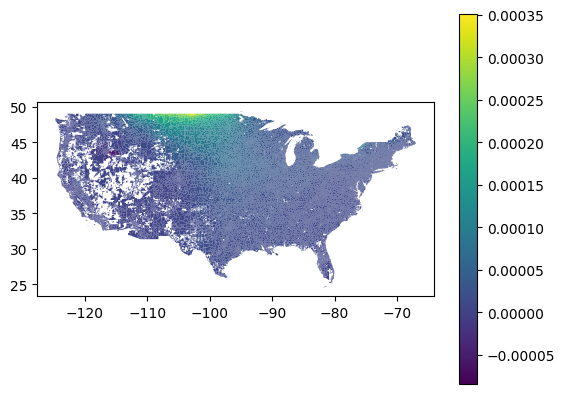

In [16]:
# plot map
gdf.plot(column="mean", legend=True)

In [ ]:
files = glob.glob("../data/output/*.csv")
# read all arrays in dict
arrays = {}
for f in tqdm(files):
    with xr.open_dataset(f) as ds:
        arrays[os.path.basename(f)] = ds.PM25.values

In [ ]:
def plot_sector(arrays, sector):
    # make a big plot of 4 colums and 3 rows
    sector_keys = pm25_keys = {k for k in arrays.keys() if sector in k}
    fig, axs = plt.subplots(2, 4, figsize=(12, 4))
    for i, k in enumerate(sector_keys):
        v = arrays[k]
        title = k.split(".")[-3]
        # plot map
gdf.plot(column="mean", legend=True)    
    plt.subplots_adjust(wspace=0, hspace=0)

plot_sector(arrays, "PM25")